
# Competition Data Analysis and Model Building

This notebook automates the following tasks for each dataset folder within the Competition_data:
1. **Data Loading and Preprocessing**: Load each dataset, handle missing values, and perform feature engineering.
2. **Visualization**: Generate visualizations to understand the distribution and relationships between features.
3. **Model Training**: Split the data, train a binary classification model, and evaluate using accuracy, precision, and F1 score.
4. **Inference and Saving Results**: Make predictions on test data and save them to `y_predict.csv`.

## Scoring Metric
The final score is calculated as:
$$\text{Score} = \text{Accuracy} \times 0.3 + \text{Precision} \times 0.4 + \text{F1 Score} \times 0.3$$


In [ ]:

# Install imbalanced-learn library if not already installed
# !pip install imbalanced-learn


In [1]:

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")


Processing Competition_data/Dataset_2...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:58:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:58:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:58:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:58:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_2: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_35...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:59:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:59:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:59:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:59:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_35: Accuracy=0.792, Precision=0.824, F1 Score=0.771, Score=0.798
Processing Competition_data/Dataset_5...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:00:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:00:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:00:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:00:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_5: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_32...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:01:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:01:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:01:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:01:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_32: Accuracy=0.768, Precision=0.752, F1 Score=0.789, Score=0.768
Processing Competition_data/Dataset_4...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:03:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:03:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:03:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:03:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_4: Accuracy=0.985, Precision=0.981, F1 Score=0.985, Score=0.983
Processing Competition_data/Dataset_33...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:04:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:04:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:04:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:04:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_33: Accuracy=0.984, Precision=1.000, F1 Score=0.986, Score=0.991
Processing Competition_data/Dataset_3...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:05:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:05:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:05:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:05:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_3: Accuracy=0.714, Precision=0.875, F1 Score=0.778, Score=0.798
Processing Competition_data/Dataset_34...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:06:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:06:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:06:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:06:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_34: Accuracy=0.857, Precision=0.848, F1 Score=0.862, Score=0.855
Processing Competition_data/Dataset_45...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:07:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:07:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:07:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:07:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_45: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_42...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:07:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:07:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:07:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:07:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_42: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_27...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:08:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:08:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:08:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:08:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_27: Accuracy=0.978, Precision=1.000, F1 Score=0.978, Score=0.987
Processing Competition_data/Dataset_18...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:09:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:09:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:09:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:09:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_18: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_20...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:10:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:10:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:10:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:10:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_20: Accuracy=0.892, Precision=0.882, F1 Score=0.882, Score=0.885
Processing Competition_data/Dataset_16...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:11:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:11:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:11:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:11:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_16: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_29...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:12:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:12:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:12:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:12:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_29: Accuracy=0.871, Precision=0.875, F1 Score=0.862, Score=0.870
Processing Competition_data/Dataset_11...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:13:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:13:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:13:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:13:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_11: Accuracy=0.842, Precision=0.667, F1 Score=0.727, Score=0.737
Processing Competition_data/Dataset_43...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:14:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:14:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:14:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:14:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_43: Accuracy=0.768, Precision=0.752, F1 Score=0.789, Score=0.768
Processing Competition_data/Dataset_44...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:15:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:15:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:15:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:15:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_44: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_10...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:16:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:16:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:16:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:16:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_10: Accuracy=0.655, Precision=0.679, F1 Score=0.667, Score=0.668
Processing Competition_data/Dataset_17...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:17:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:17:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:17:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:17:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_17: Accuracy=0.846, Precision=0.909, F1 Score=0.833, Score=0.867
Processing Competition_data/Dataset_28...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:18:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:18:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:18:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:18:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_28: Accuracy=0.808, Precision=0.818, F1 Score=0.796, Score=0.809
Processing Competition_data/Dataset_21...


/var/folders/y1/36krdqms3ylf80qt9dq3mjmm0000gn/T/ipykernel_66668/2993874970.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 3, figsize=(15, 5))
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:19:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:19:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Wo

Stacking Model Validation Score for Competition_data/Dataset_21: Accuracy=0.871, Precision=0.865, F1 Score=0.877, Score=0.870
Processing Competition_data/Dataset_26...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:20:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:20:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:20:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:20:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_26: Accuracy=0.783, Precision=0.778, F1 Score=0.808, Score=0.788
Processing Competition_data/Dataset_19...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:21:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:21:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:21:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:21:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_19: Accuracy=0.988, Precision=0.979, F1 Score=0.989, Score=0.985
Processing Competition_data/Dataset_8...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:22:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:22:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:22:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:22:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_8: Accuracy=0.878, Precision=0.897, F1 Score=0.897, Score=0.891
Processing Competition_data/Dataset_38...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:23:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:23:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:23:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:23:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_38: Accuracy=0.800, Precision=0.792, F1 Score=0.808, Score=0.799
Processing Competition_data/Dataset_6...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:24:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:24:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:24:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:24:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_6: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_31...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:25:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:25:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:25:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:25:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_31: Accuracy=0.917, Precision=1.000, F1 Score=0.929, Score=0.954
Processing Competition_data/Dataset_1...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:26:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:26:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:26:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:26:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_1: Accuracy=0.841, Precision=0.812, F1 Score=0.839, Score=0.829
Processing Competition_data/Dataset_36...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:28:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:28:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:28:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:28:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_36: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_37...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_37: Accuracy=0.789, Precision=0.812, F1 Score=0.765, Score=0.791
Processing Competition_data/Dataset_7...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:29:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:29:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:29:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:29:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_7: Accuracy=0.984, Precision=1.000, F1 Score=0.983, Score=0.990
Processing Competition_data/Dataset_30...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:31:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:31:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:31:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:31:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_30: Accuracy=0.697, Precision=0.652, F1 Score=0.667, Score=0.670
Processing Competition_data/Dataset_39...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:32:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:32:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:32:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:32:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_39: Accuracy=0.972, Precision=0.955, F1 Score=0.969, Score=0.964
Processing Competition_data/Dataset_9...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:33:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:33:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:33:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:33:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_9: Accuracy=0.867, Precision=0.733, F1 Score=0.846, Score=0.807
Processing Competition_data/Dataset_23...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:34:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:34:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:34:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:34:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_23: Accuracy=0.862, Precision=0.897, F1 Score=0.854, Score=0.874
Processing Competition_data/Dataset_24...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:36:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:36:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:36:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:36:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_24: Accuracy=0.702, Precision=0.700, F1 Score=0.687, Score=0.697
Processing Competition_data/Dataset_12...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_12: Accuracy=0.956, Precision=0.947, F1 Score=0.947, Score=0.950
Processing Competition_data/Dataset_15...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_15: Accuracy=0.780, Precision=0.792, F1 Score=0.776, Score=0.783
Processing Competition_data/Dataset_41...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:39:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:39:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:39:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:39:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_41: Accuracy=0.983, Precision=0.989, F1 Score=0.984, Score=0.986
Processing Competition_data/Dataset_46...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_46: Accuracy=0.907, Precision=0.944, F1 Score=0.895, Score=0.918
Processing Competition_data/Dataset_48...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:41:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:41:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:41:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:41:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_48: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_14...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_14: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_13...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:43:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:43:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_13: Accuracy=0.865, Precision=0.955, F1 Score=0.857, Score=0.899
Processing Competition_data/Dataset_25...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:44:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:44:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:44:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:44:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_25: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_22...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:44:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:44:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:44:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:44:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_22: Accuracy=0.788, Precision=0.857, F1 Score=0.774, Score=0.811
Processing Competition_data/Dataset_49...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:46:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:46:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:46:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:46:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_49: Accuracy=0.959, Precision=0.986, F1 Score=0.958, Score=0.969
Processing Competition_data/Dataset_47...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:47:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:47:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:47:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:47:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_47: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing Competition_data/Dataset_40...


/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:48:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:48:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:48:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jcchen/Documents/Work/Happy/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:48:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Validation Score for Competition_data/Dataset_40: Accuracy=0.792, Precision=0.824, F1 Score=0.771, Score=0.798


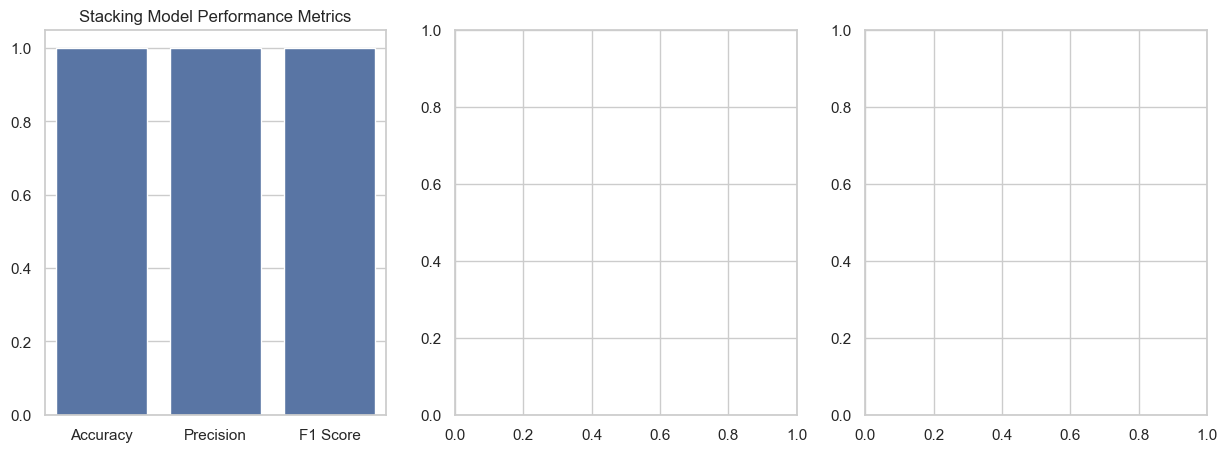

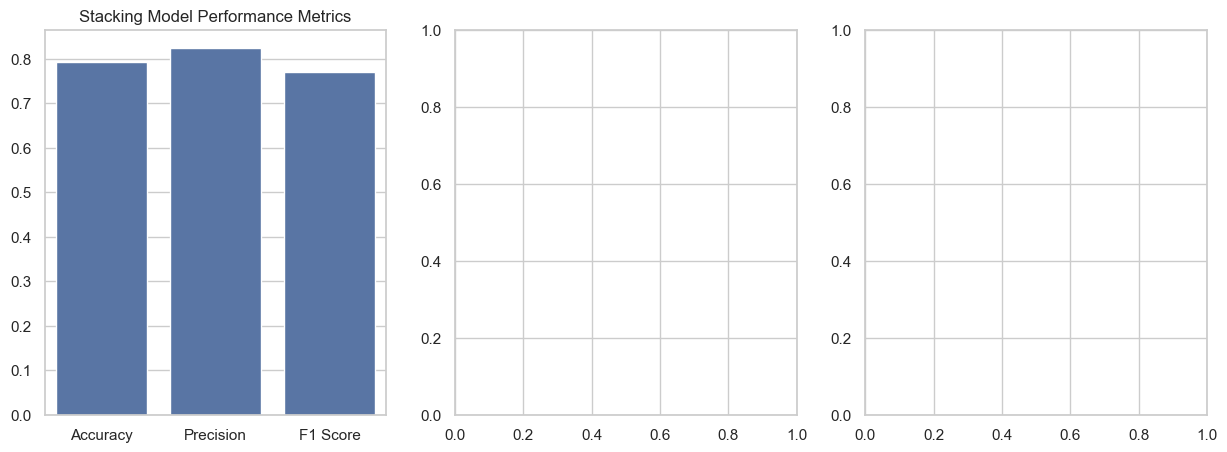

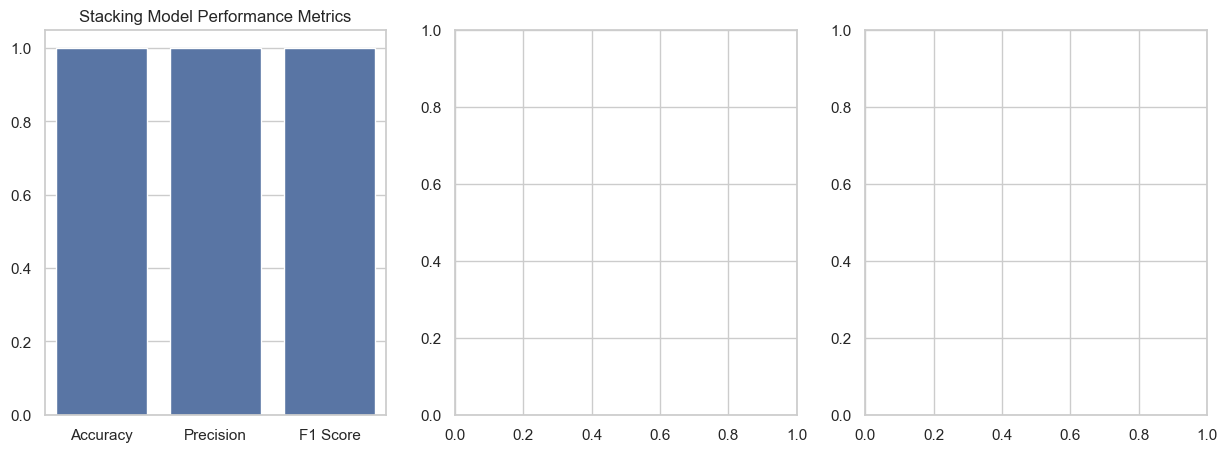

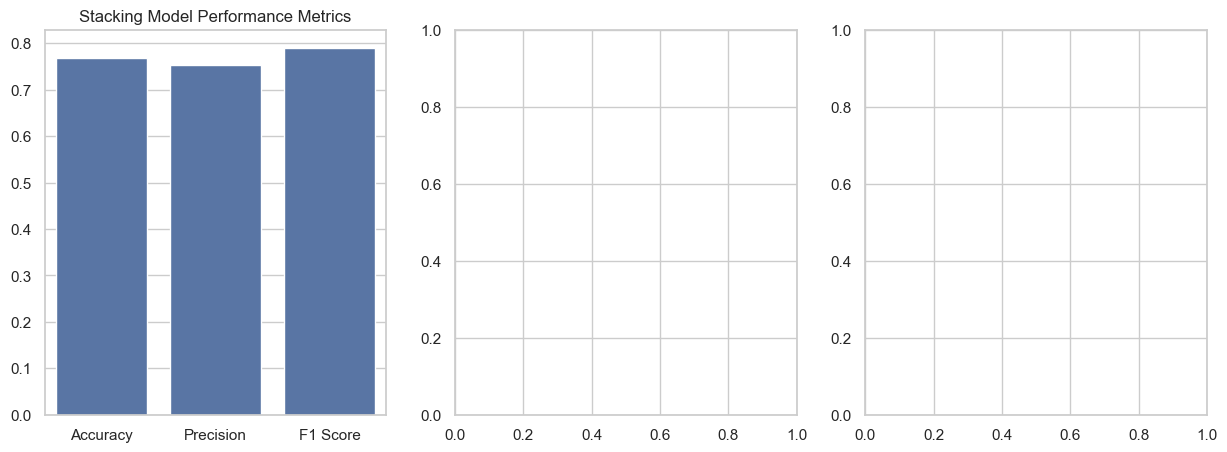

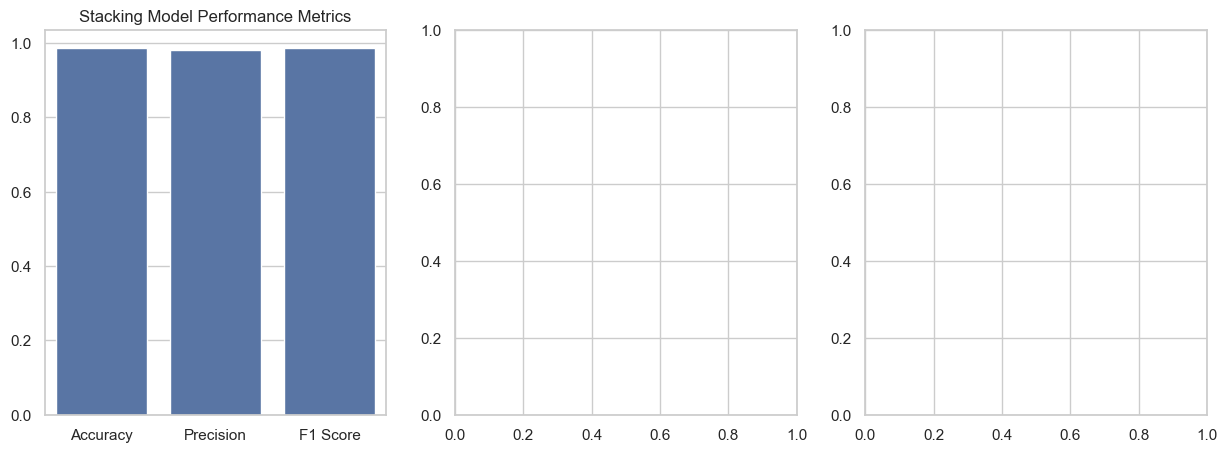

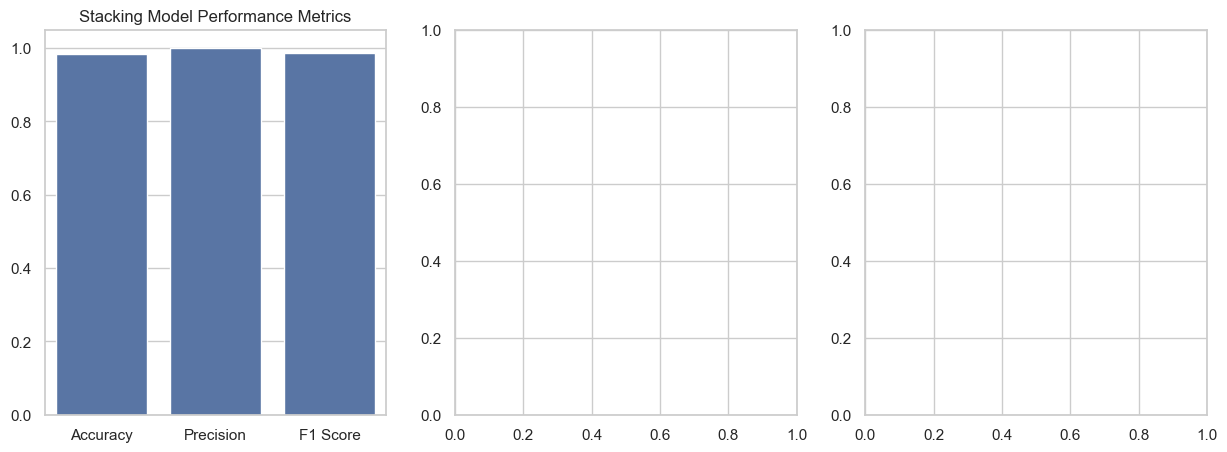

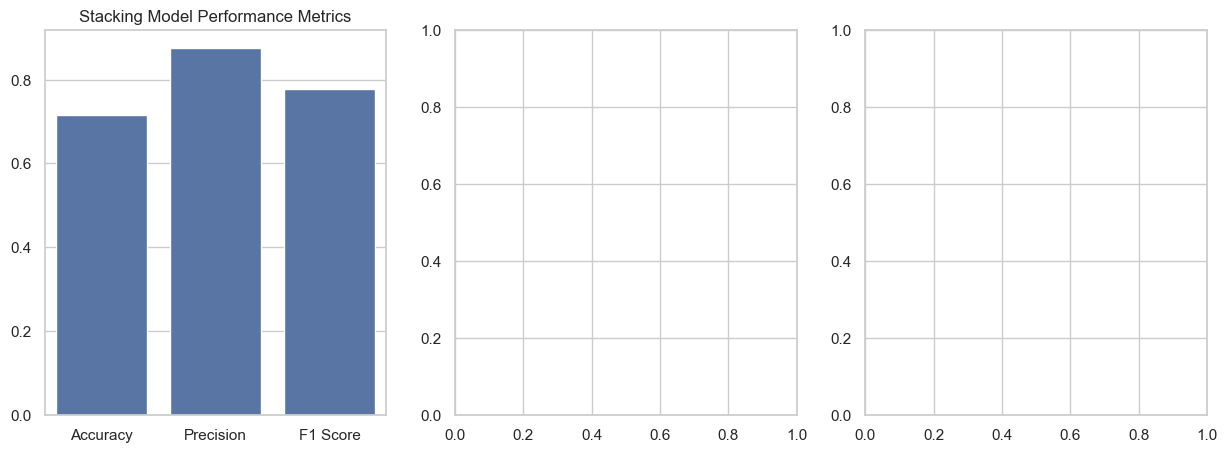

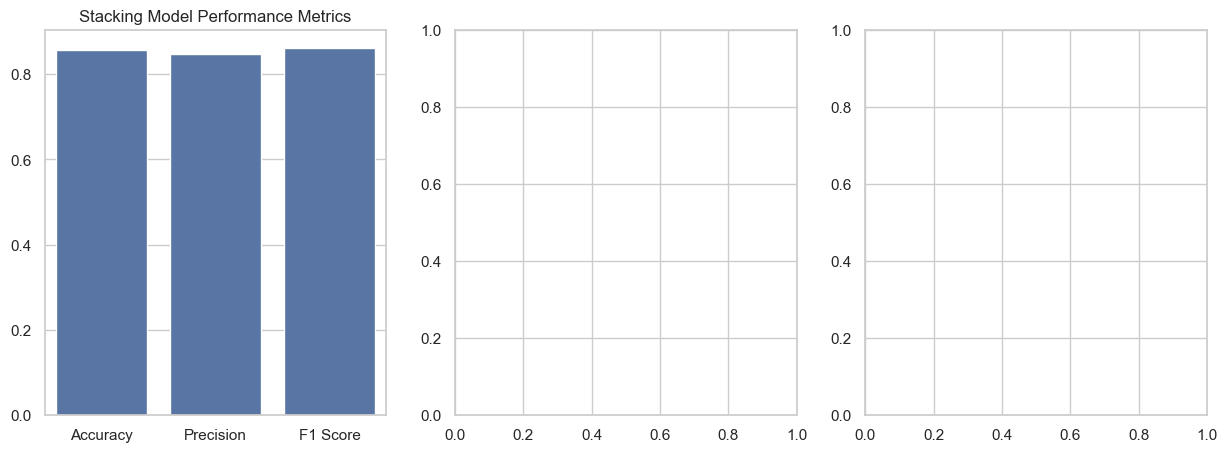

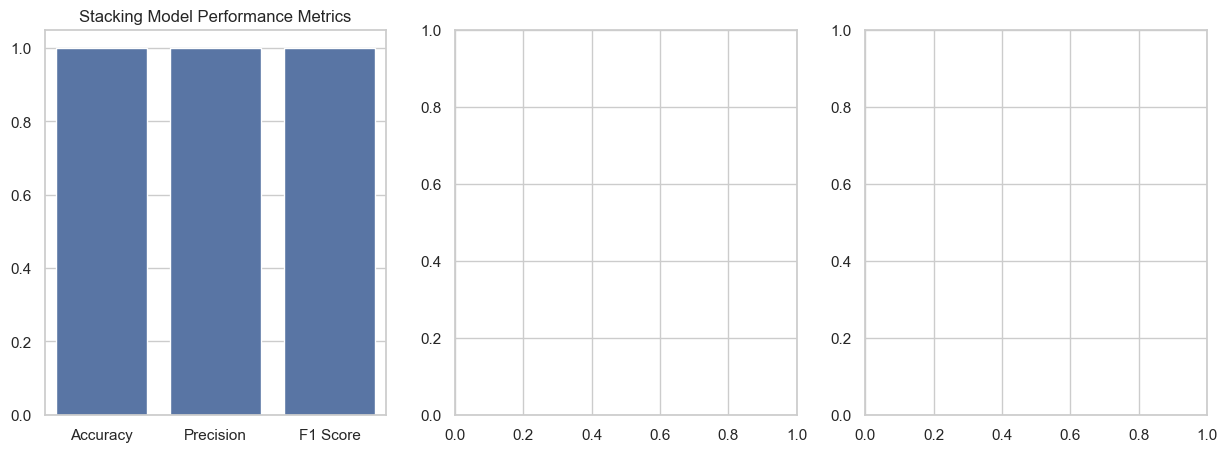

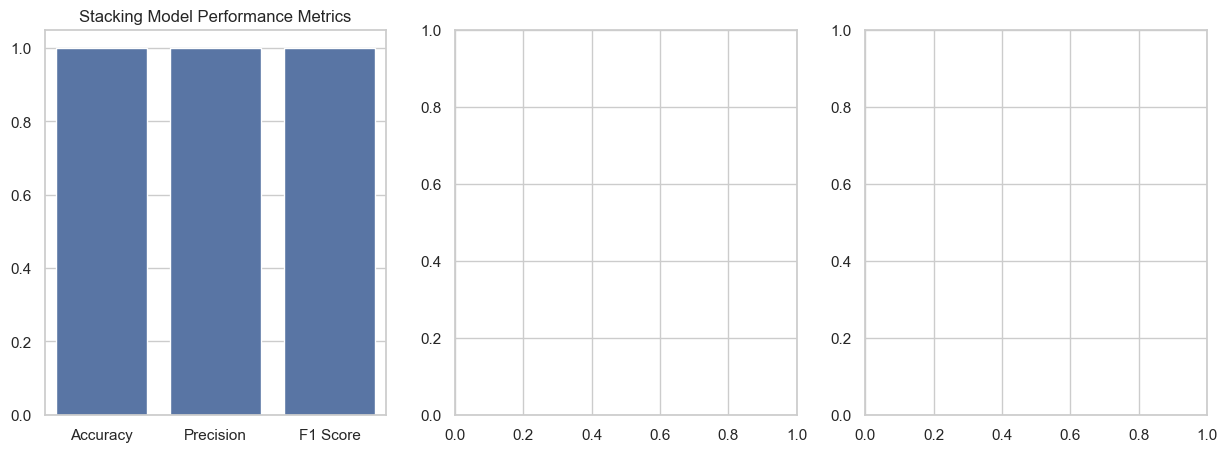

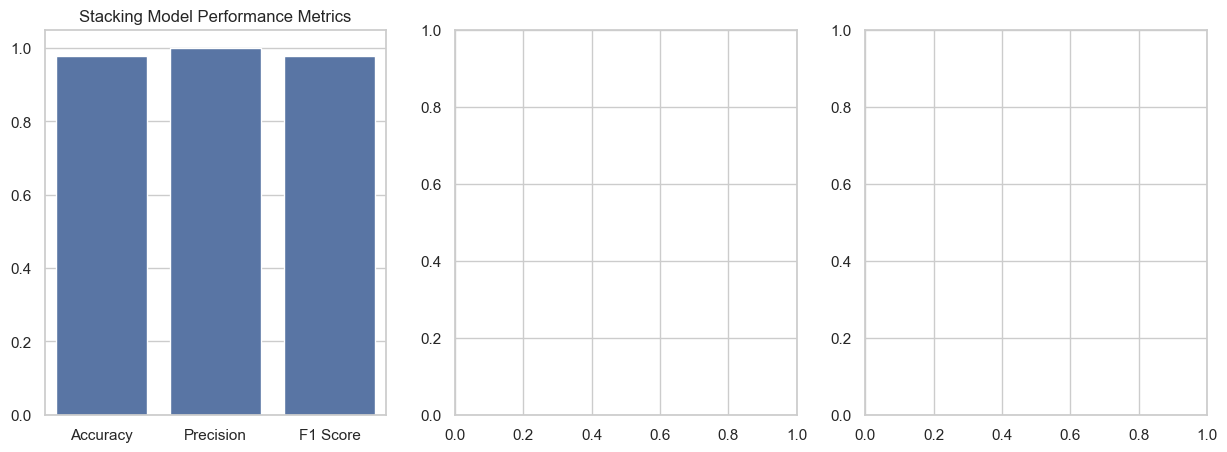

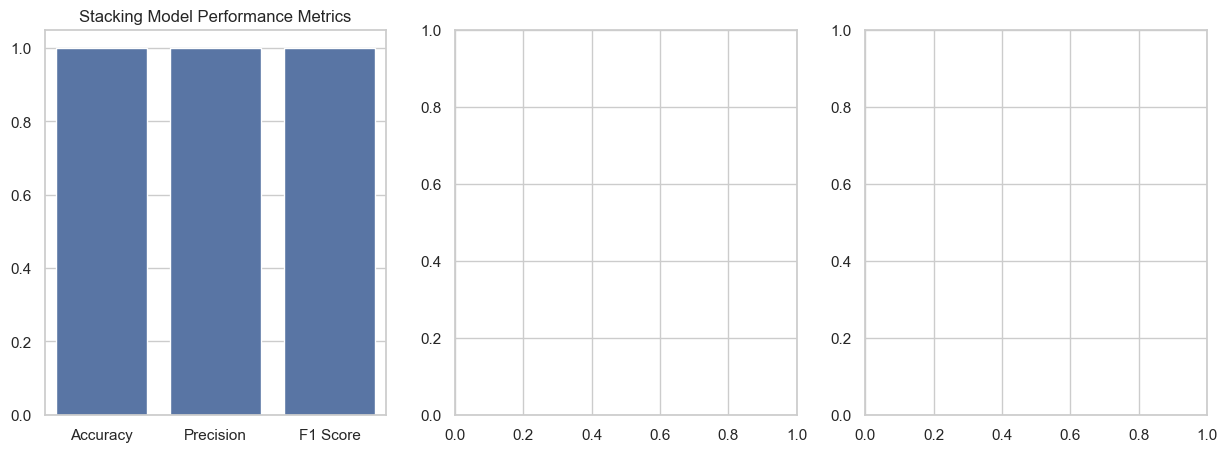

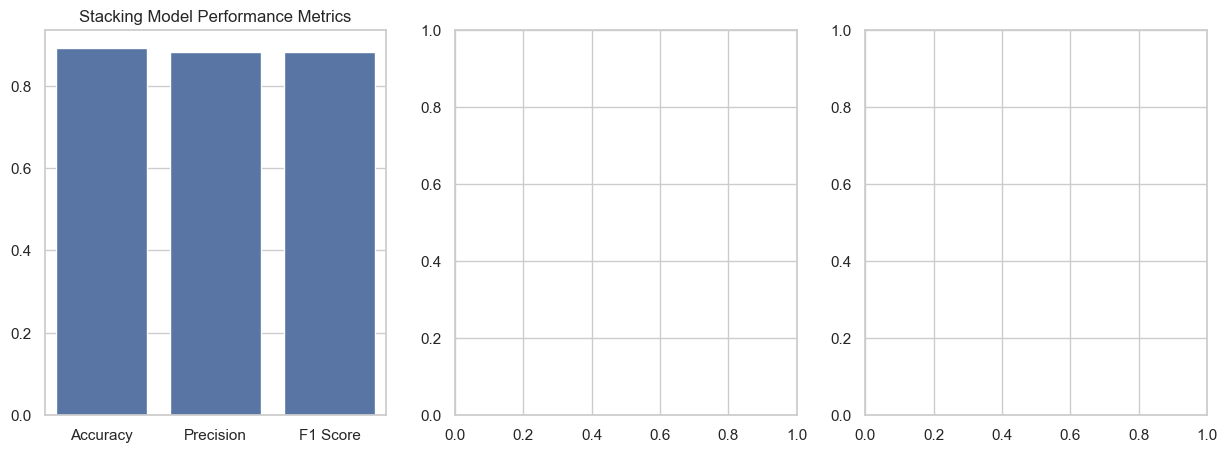

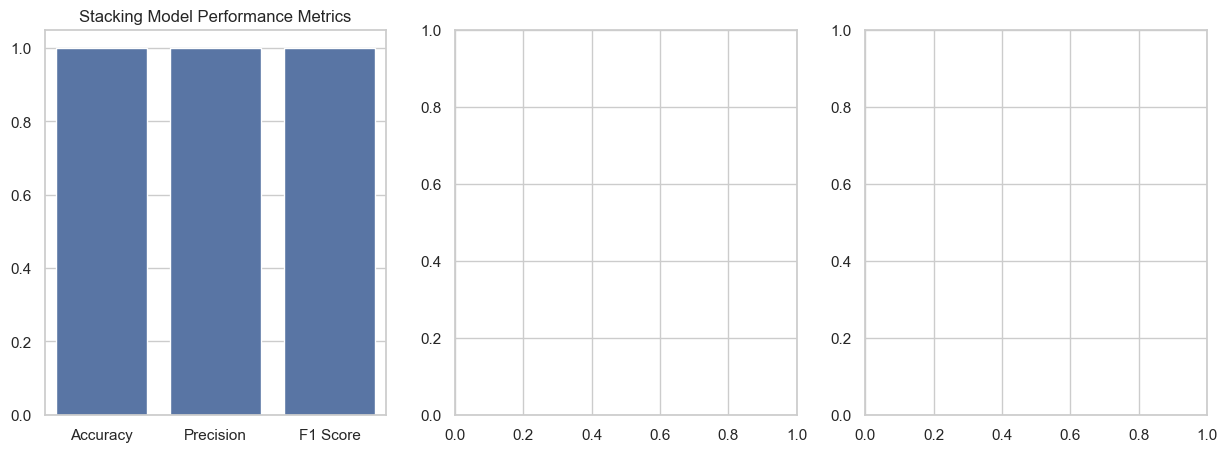

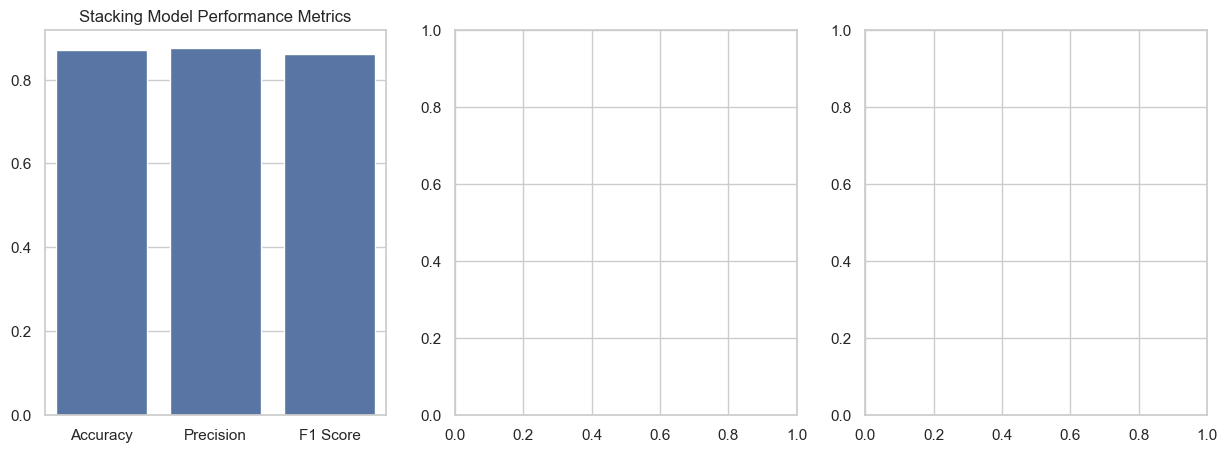

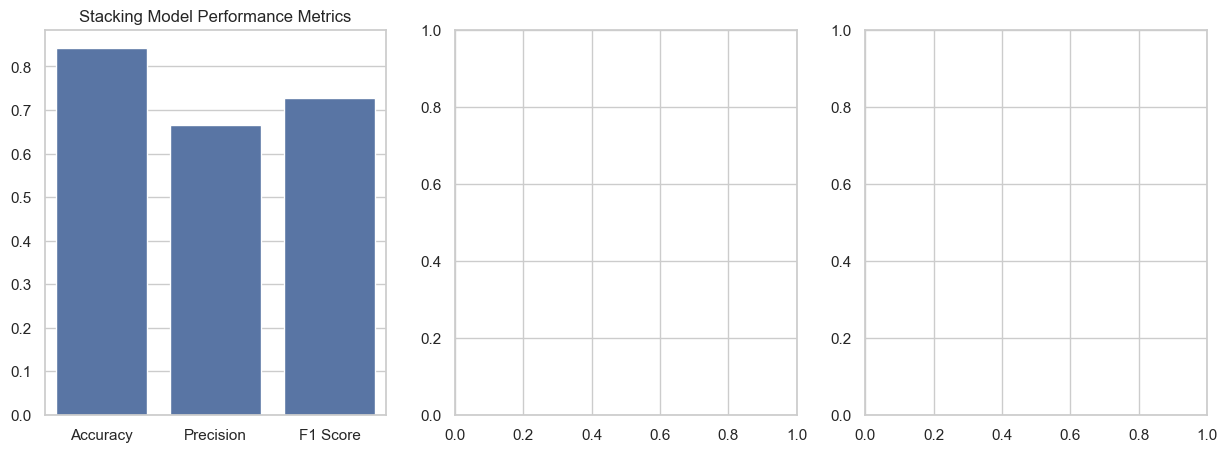

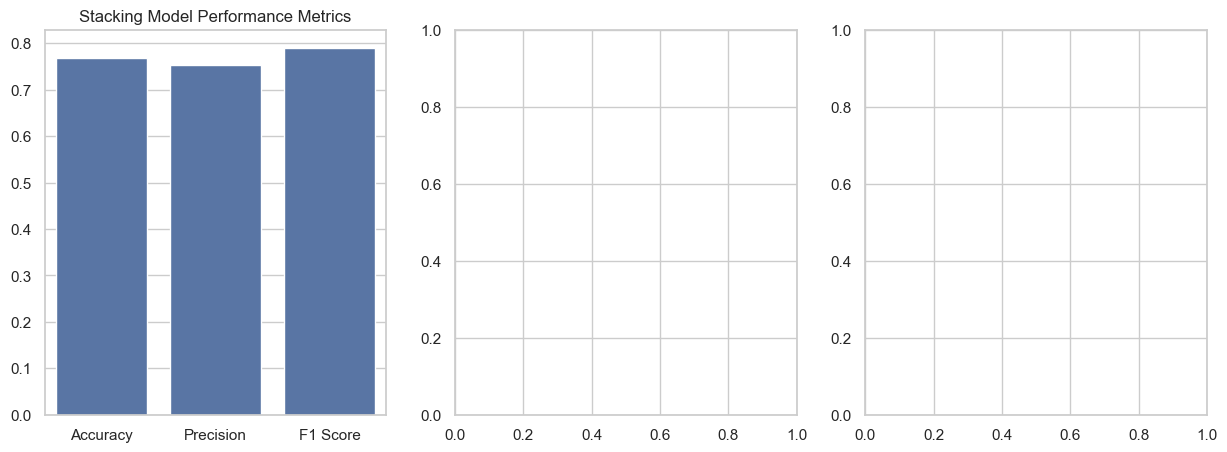

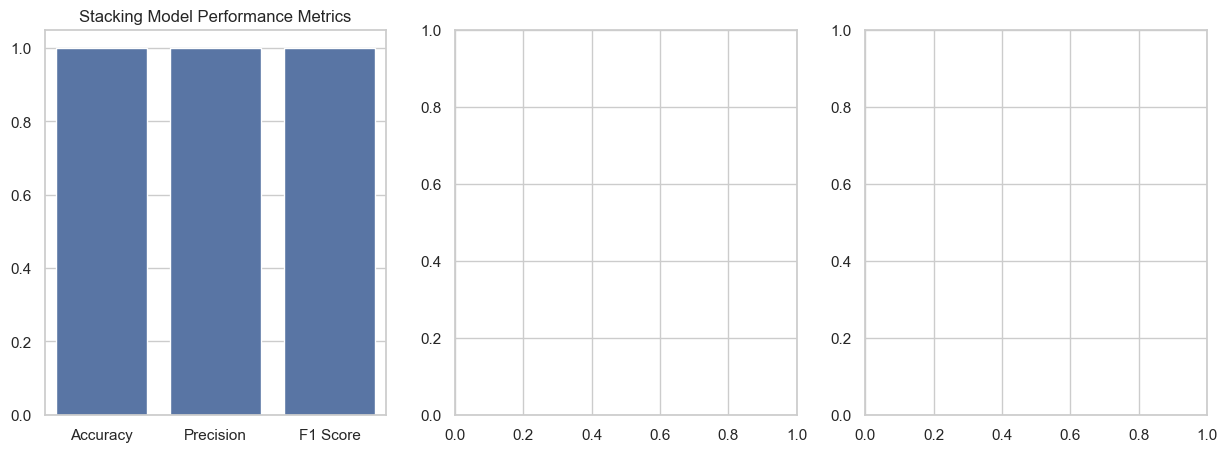

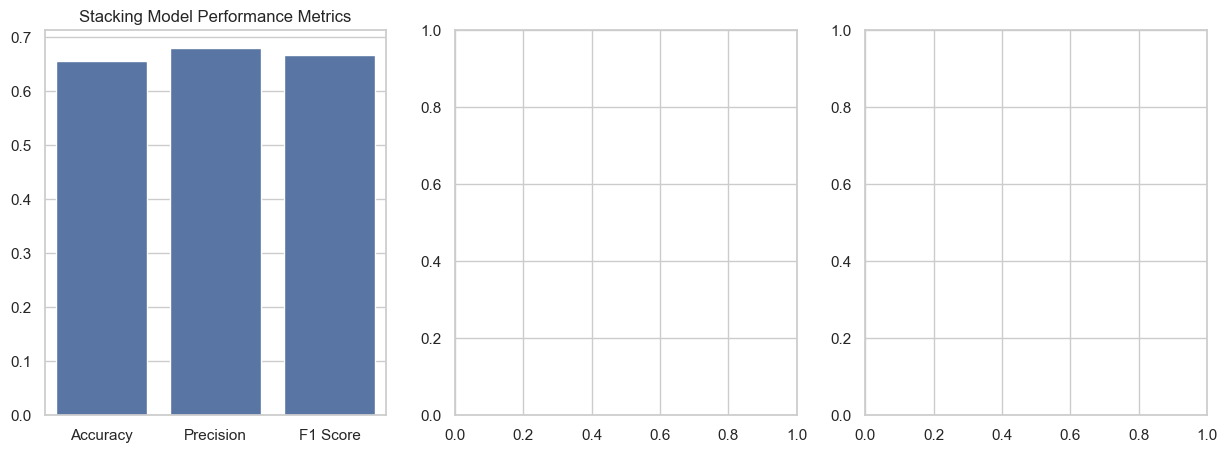

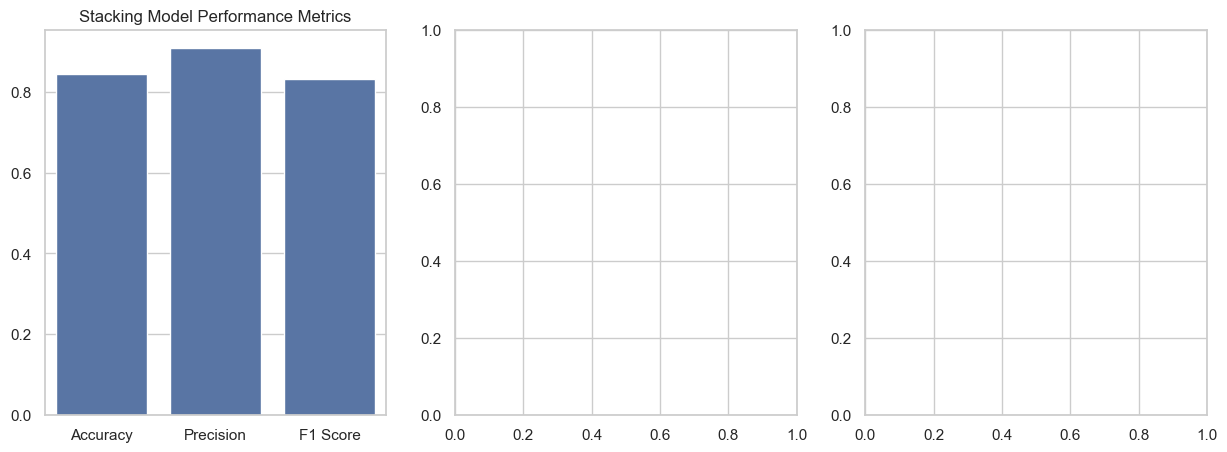

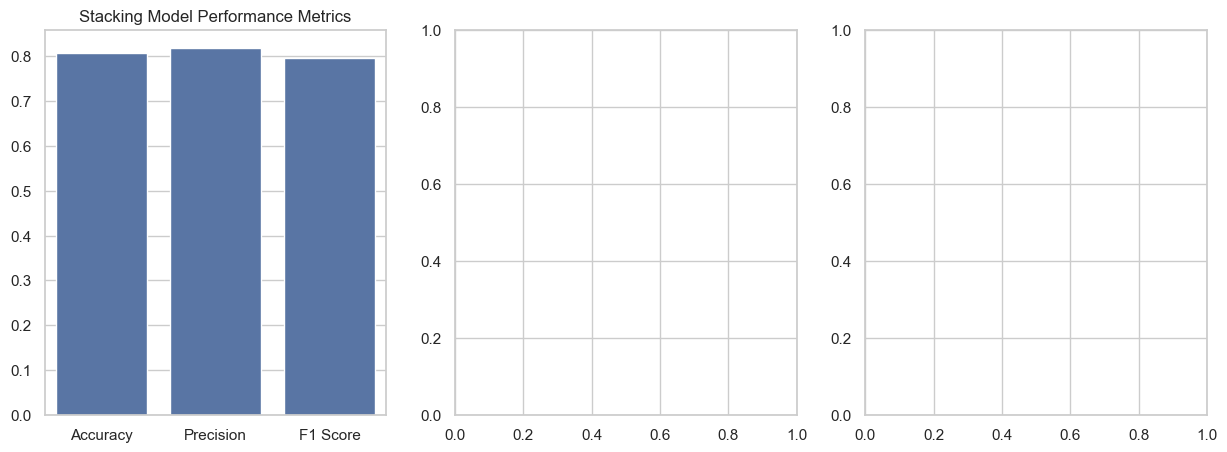

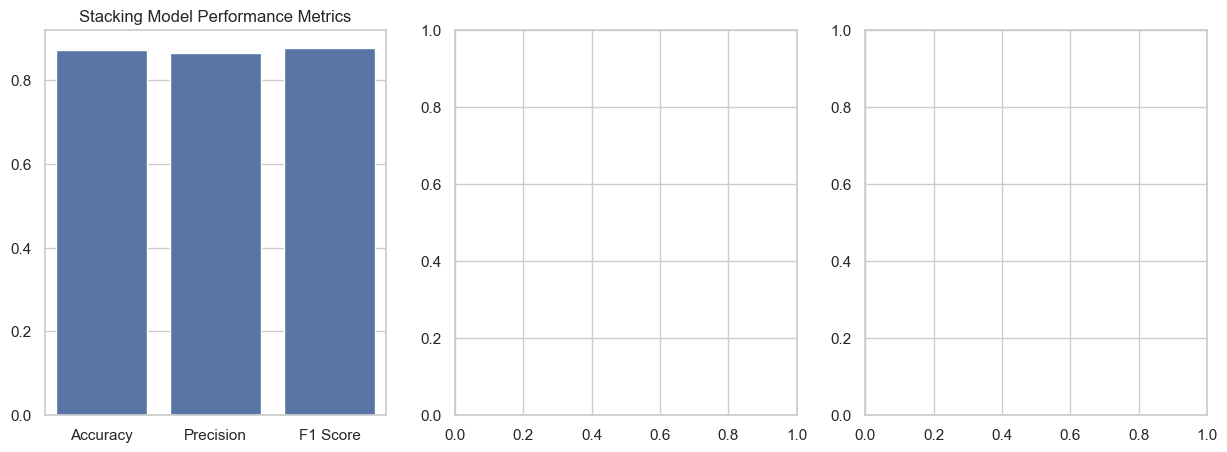

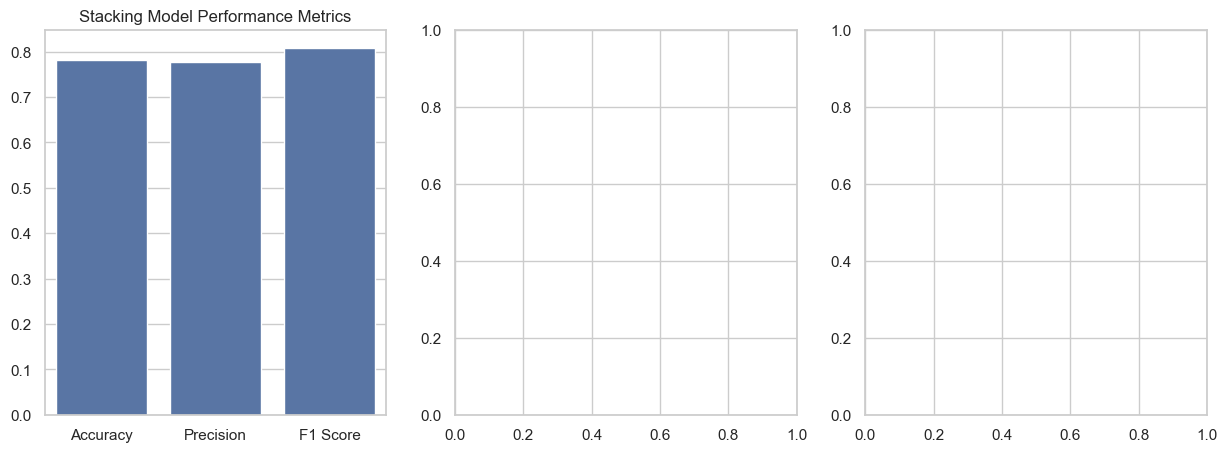

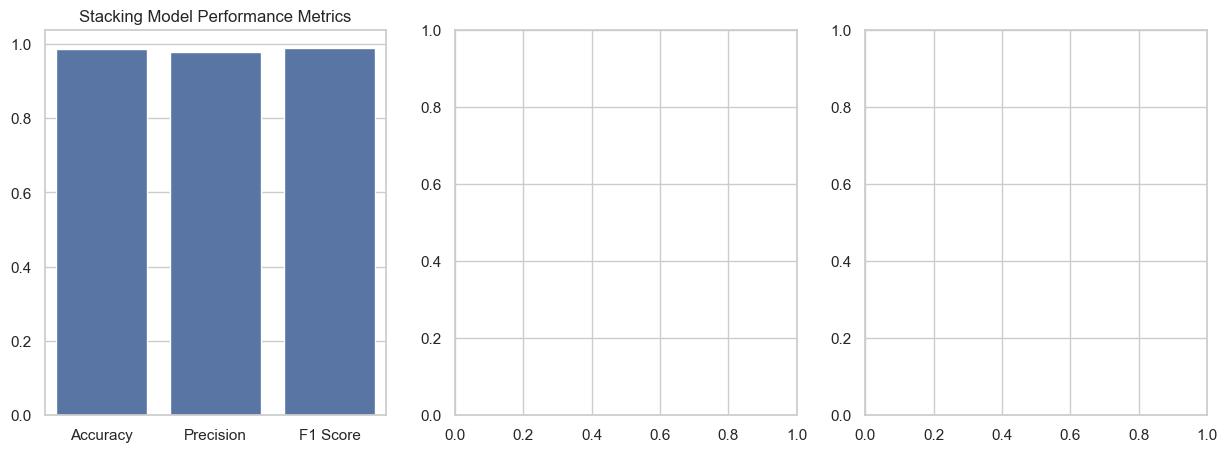

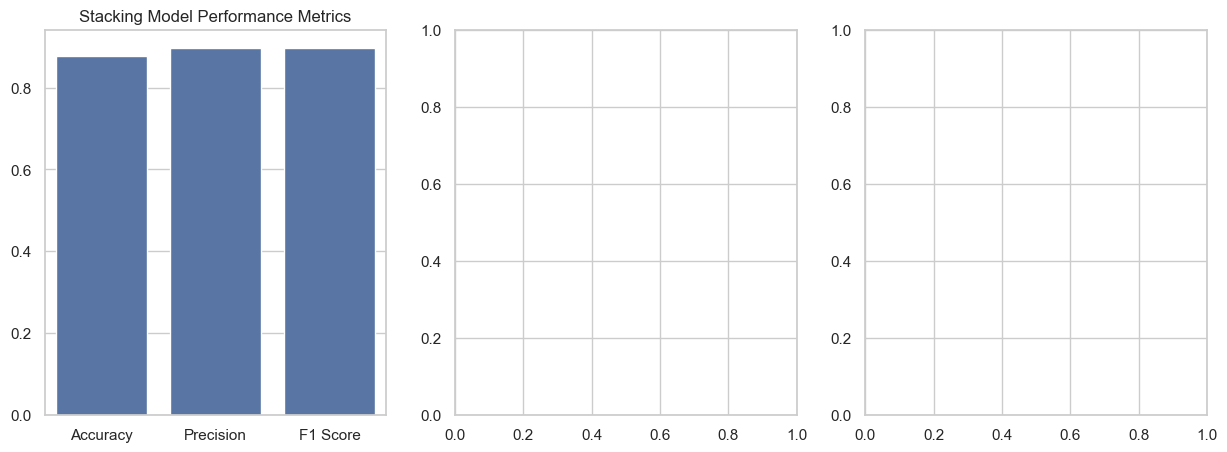

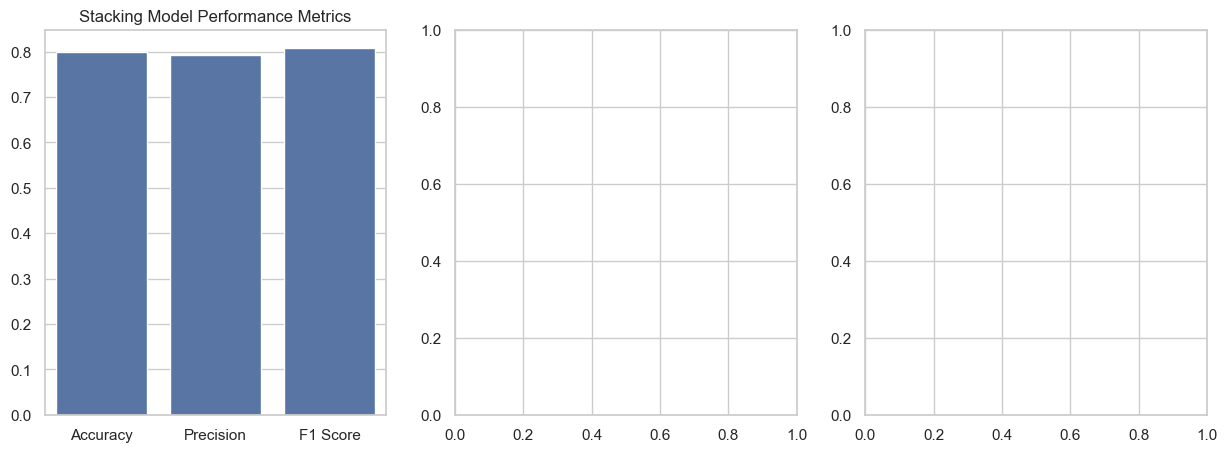

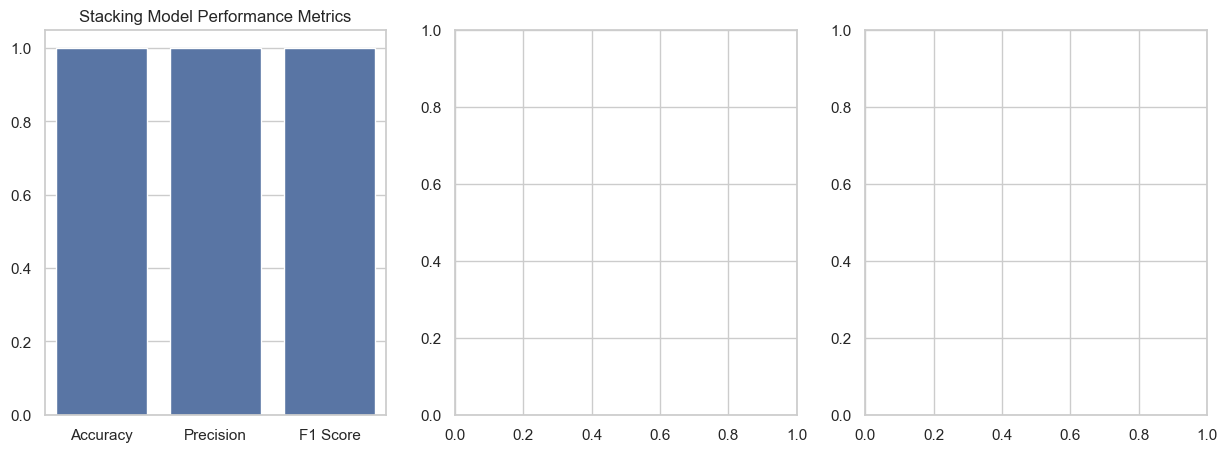

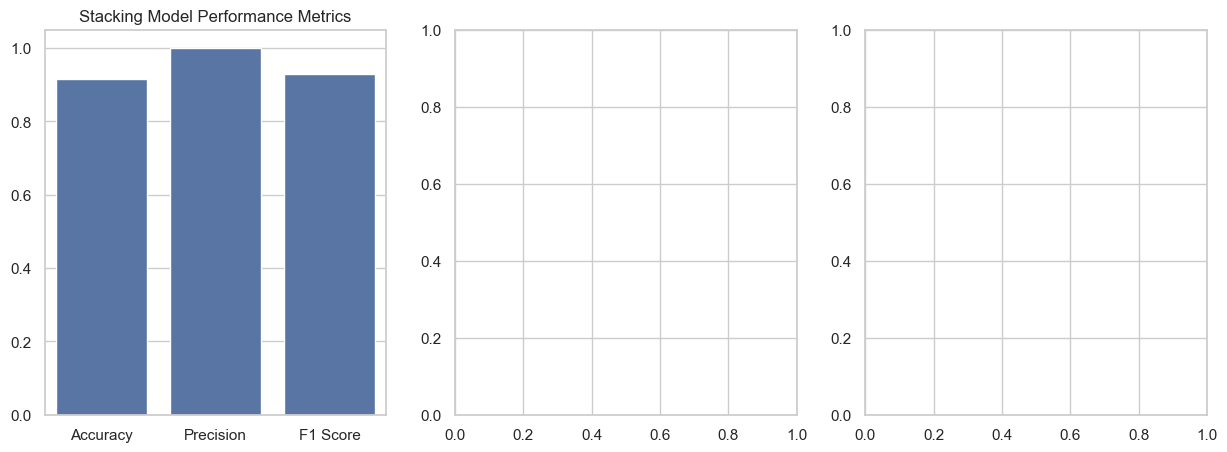

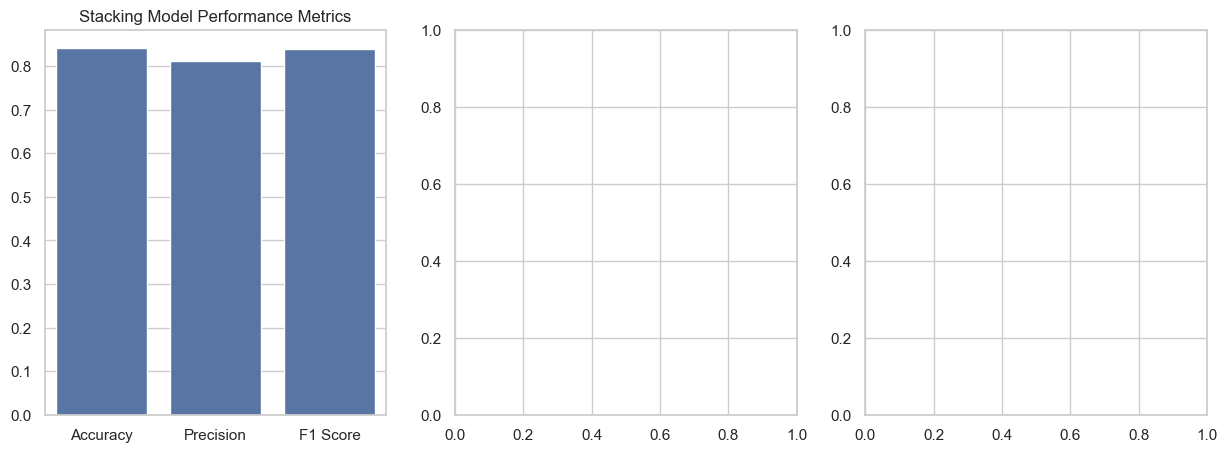

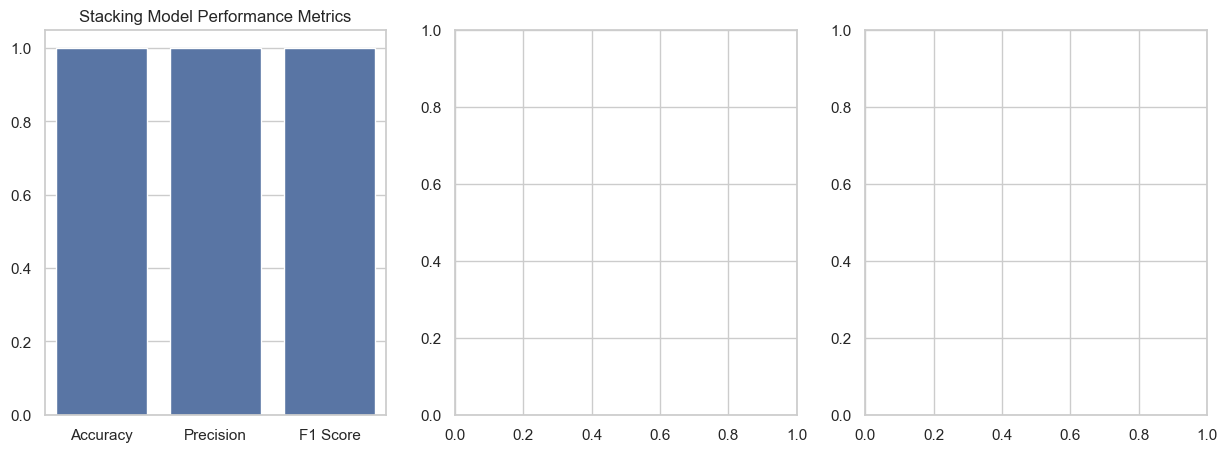

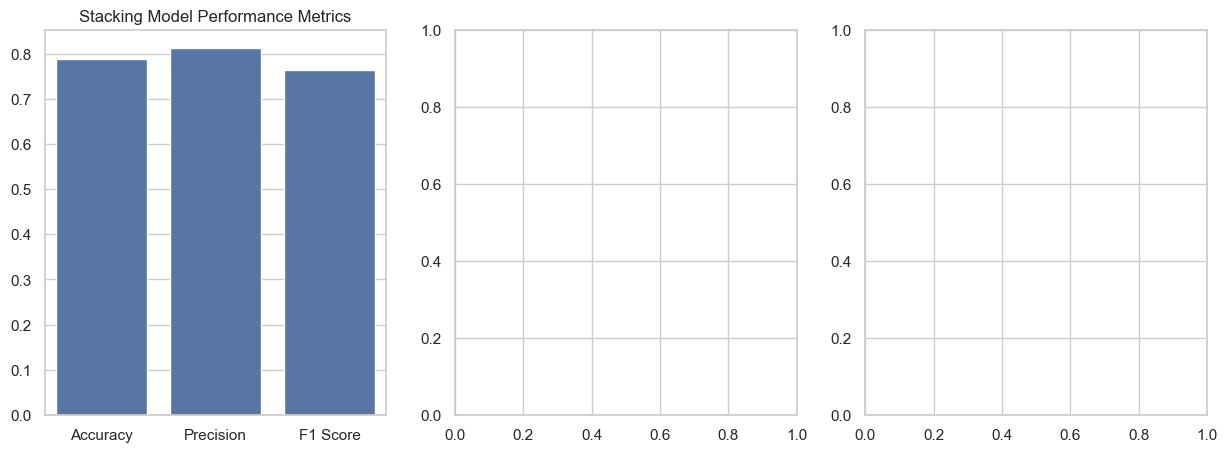

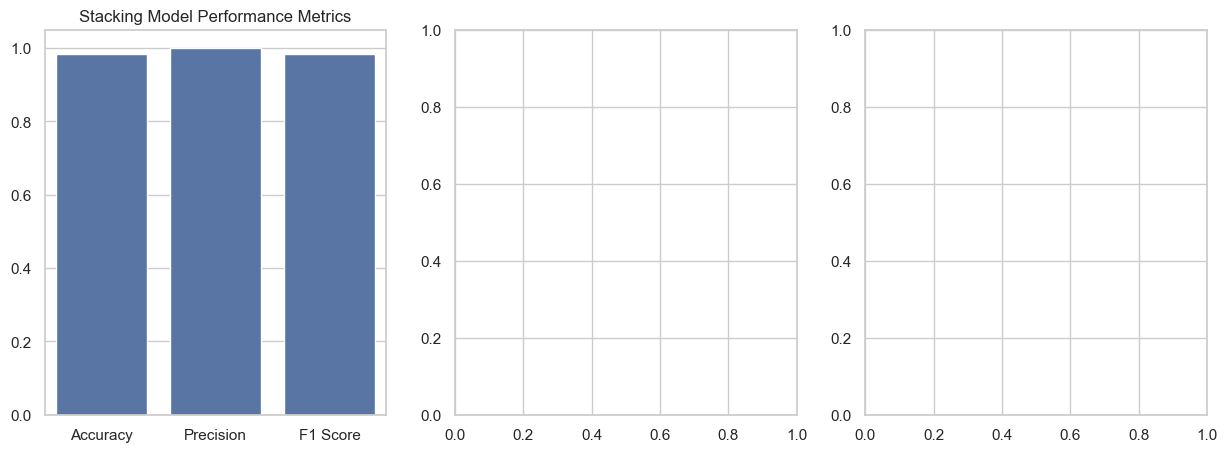

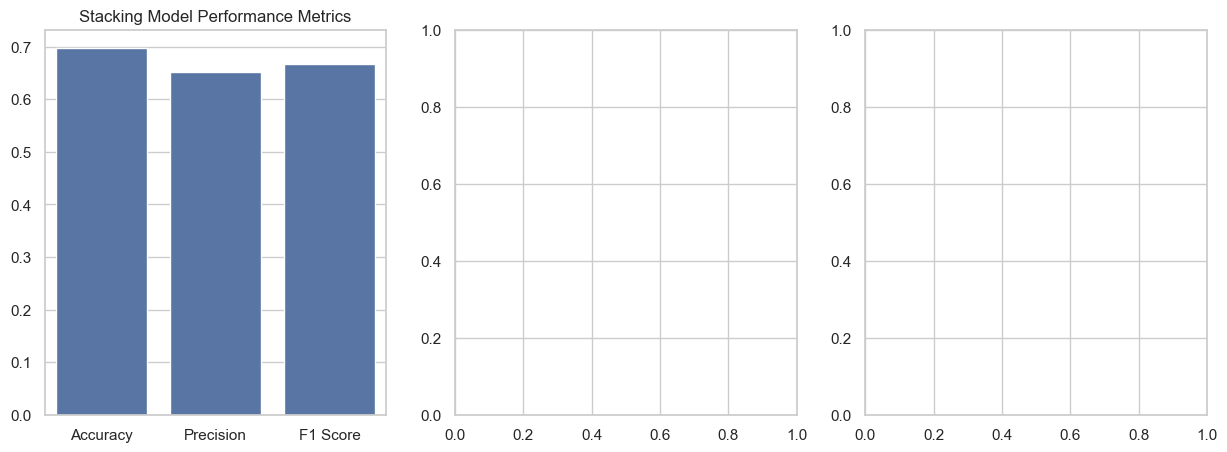

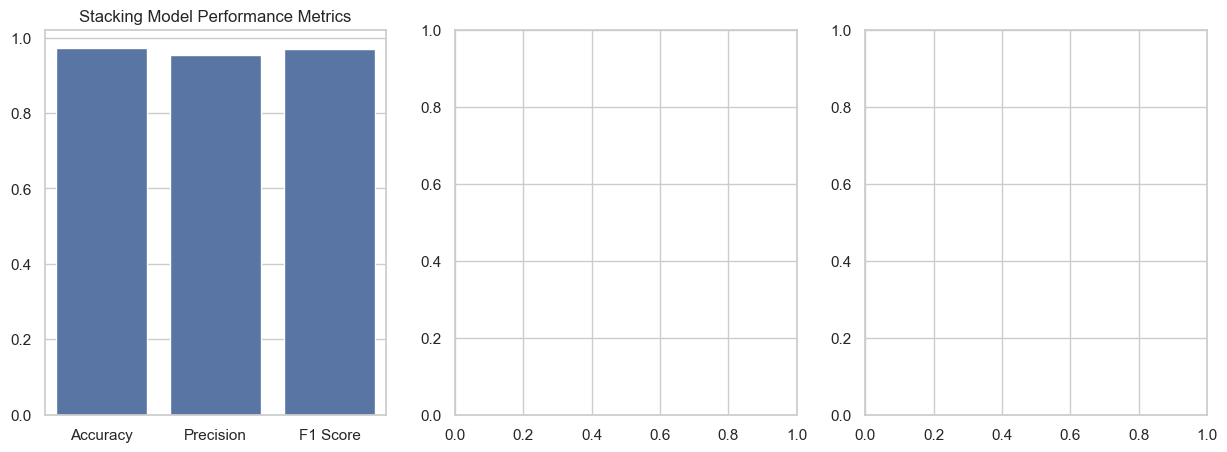

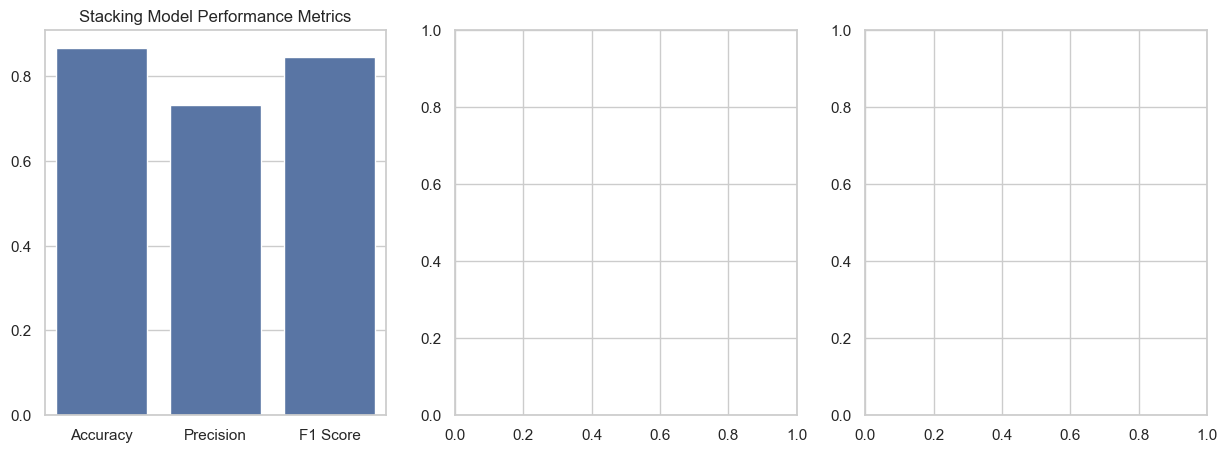

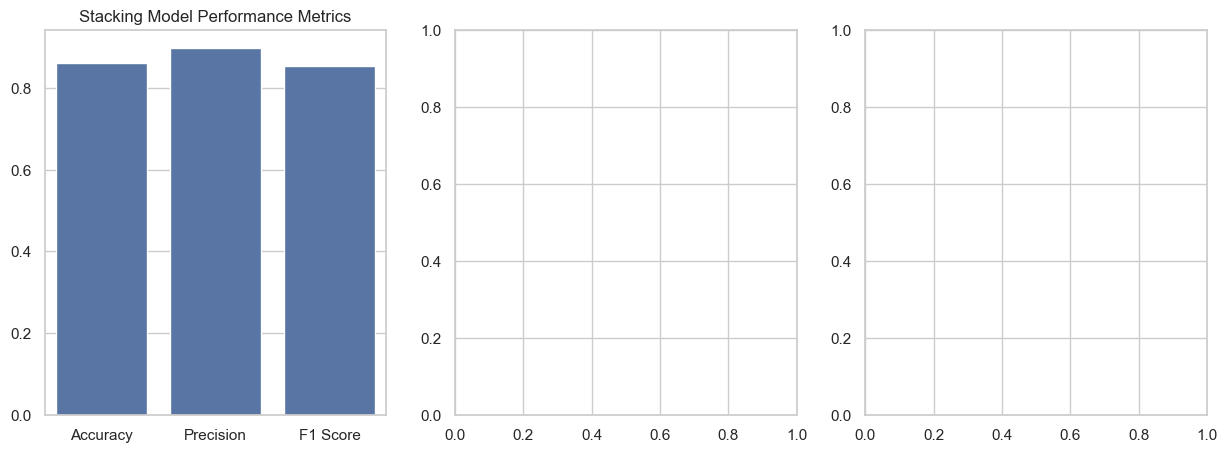

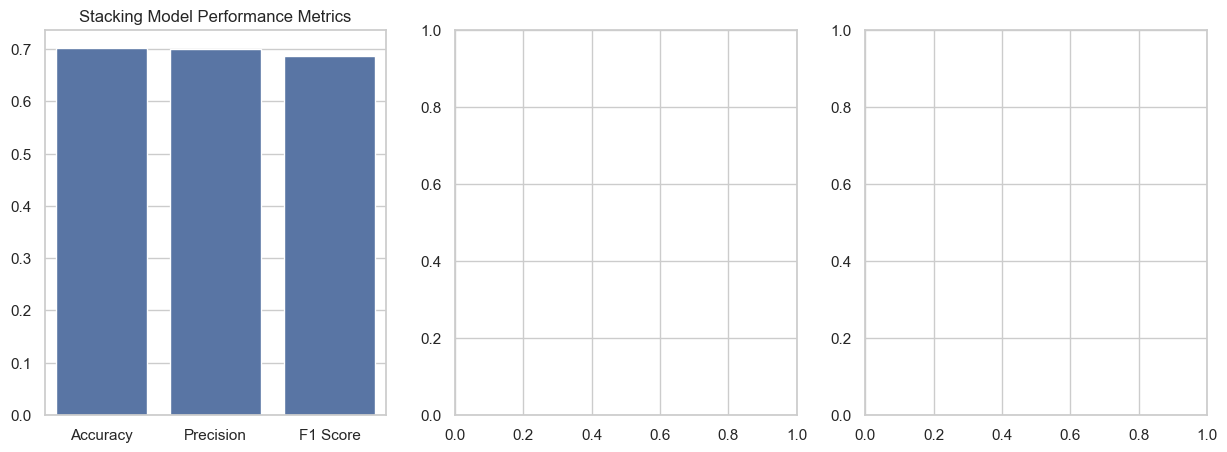

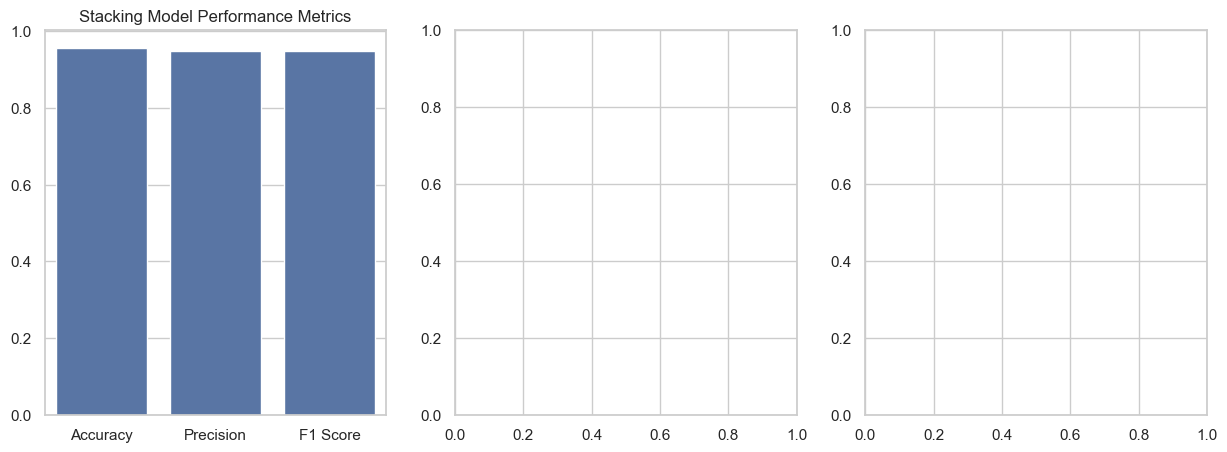

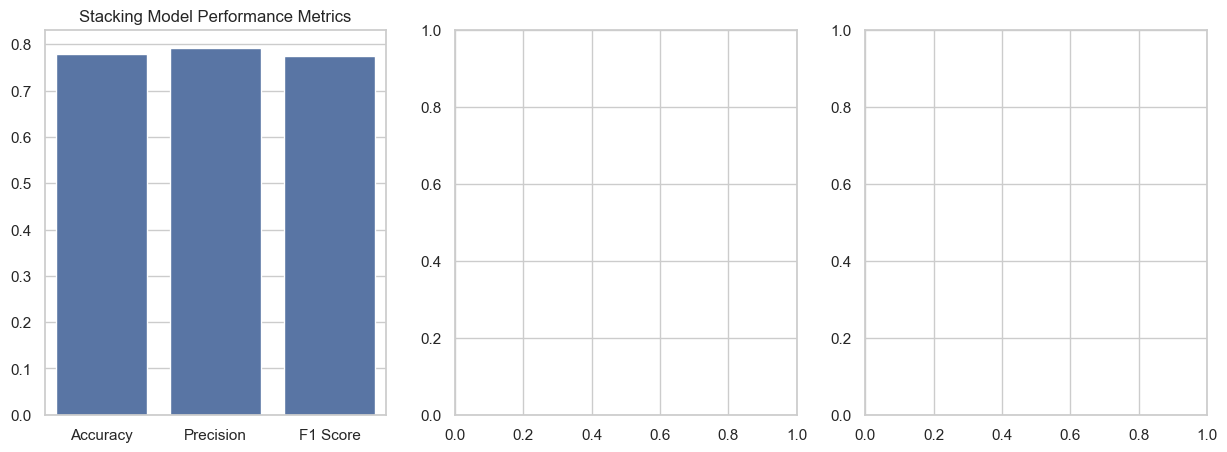

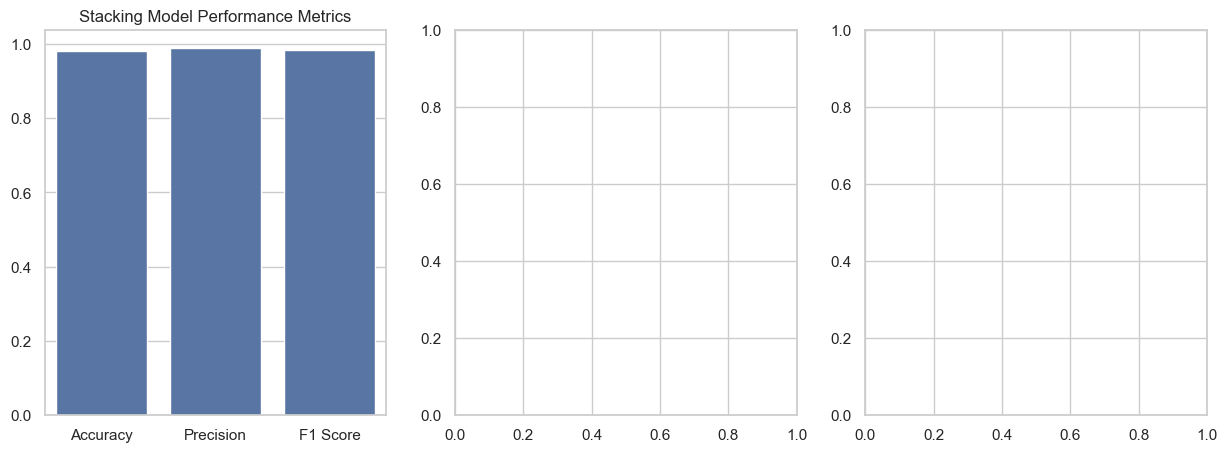

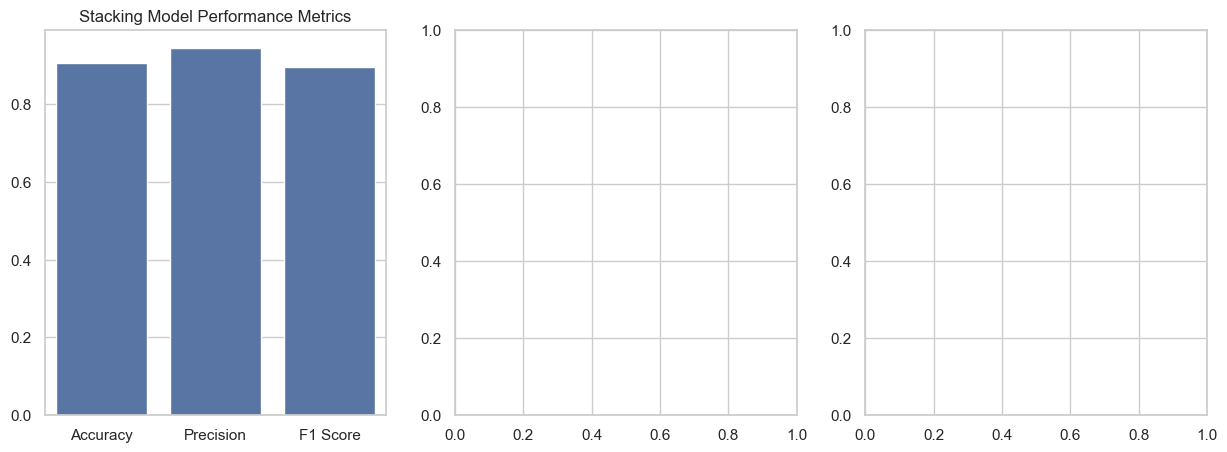

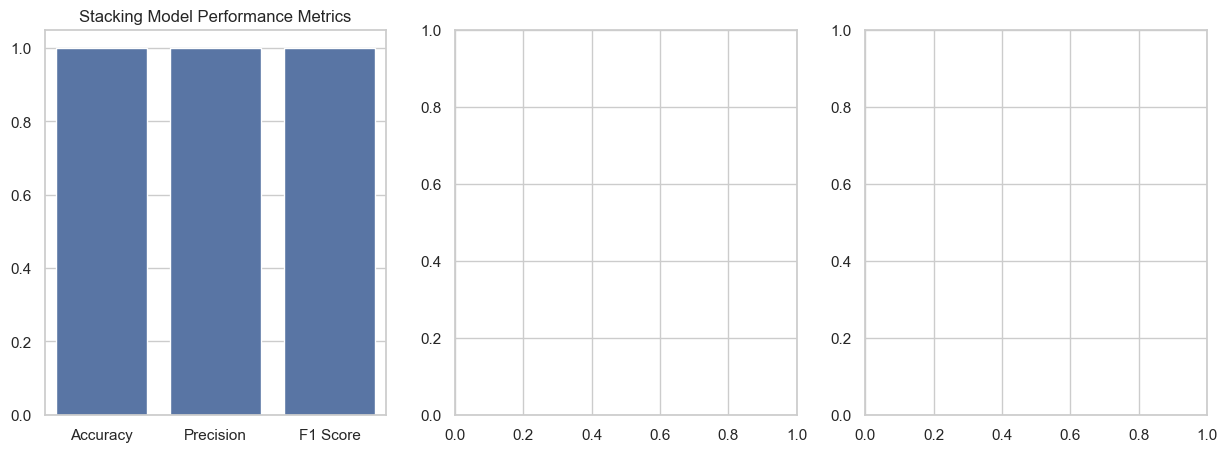

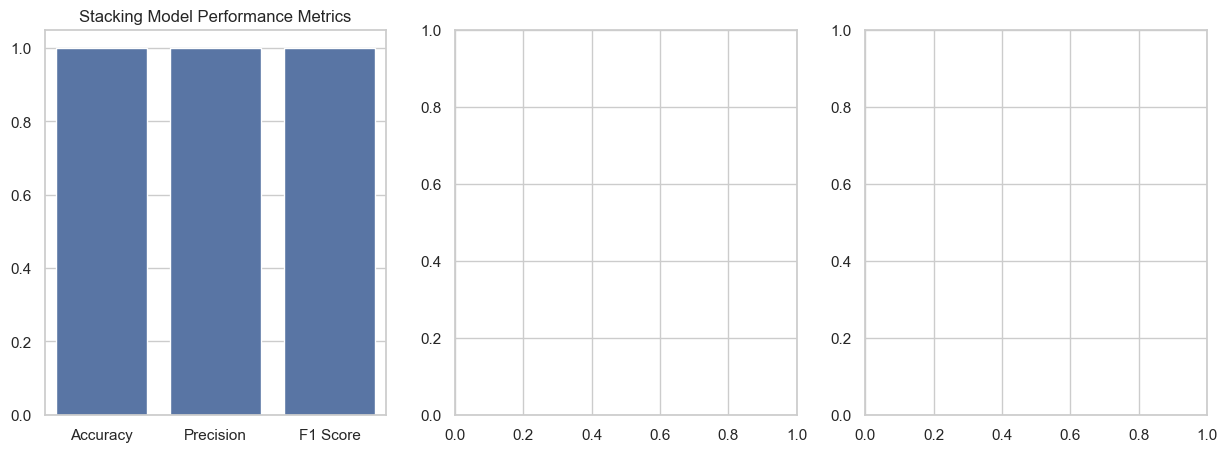

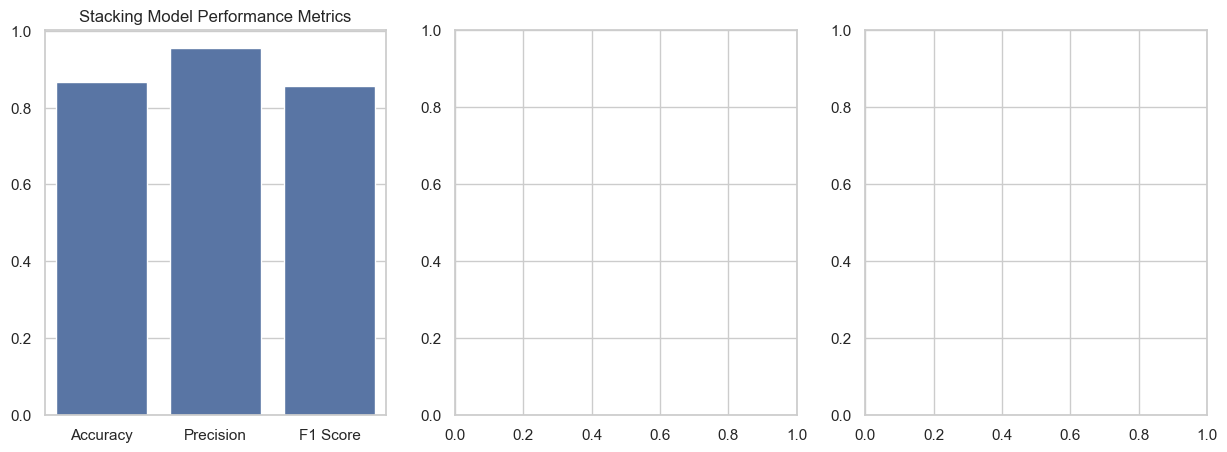

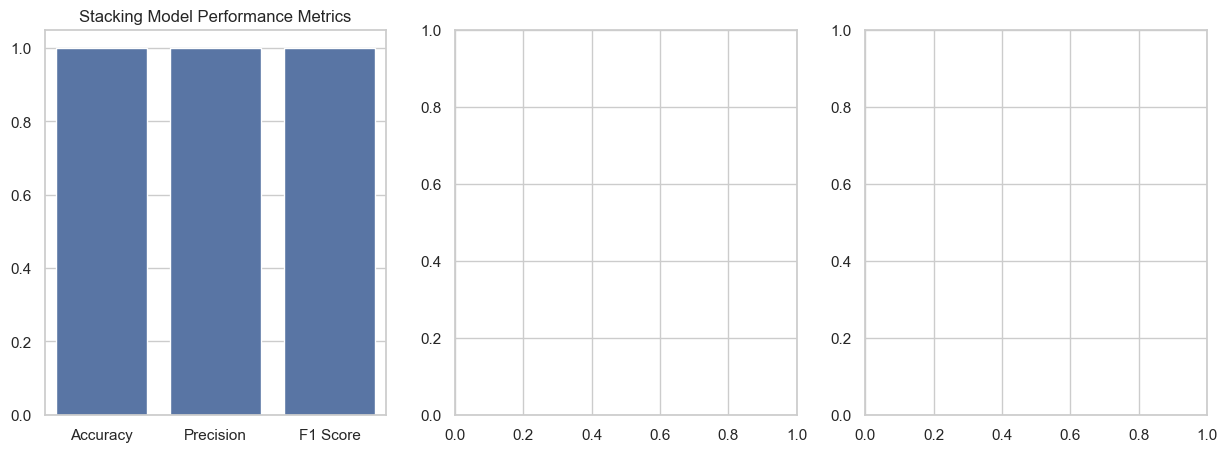

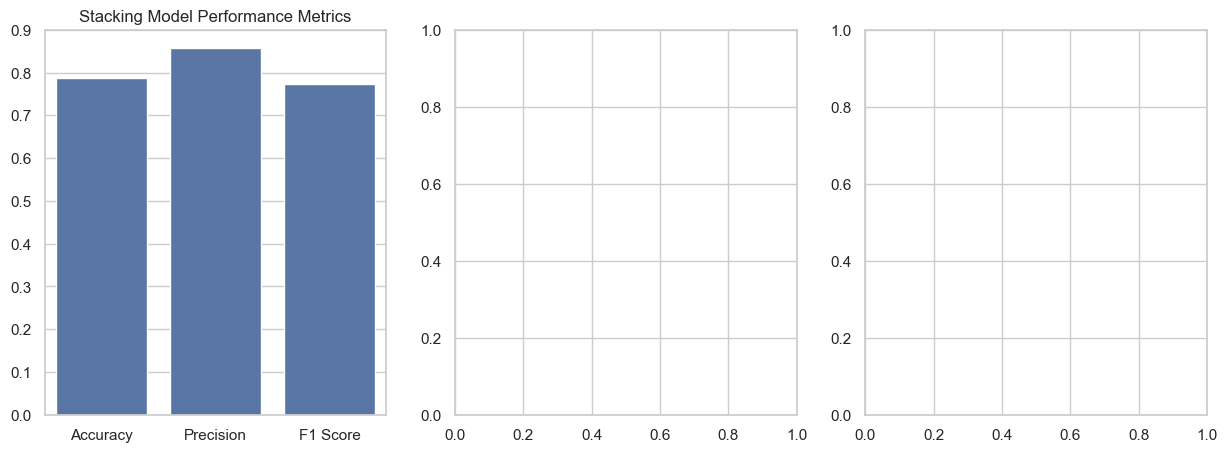

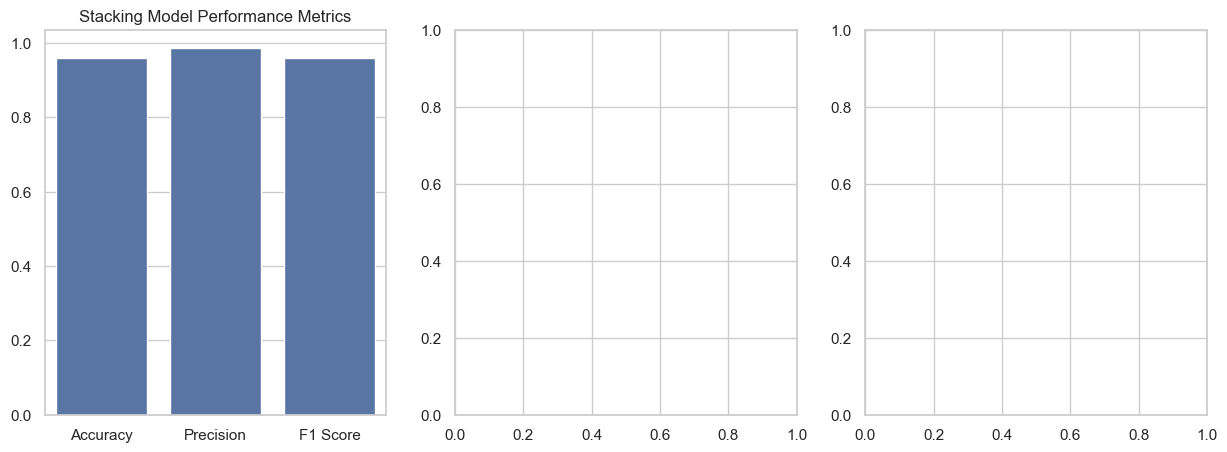

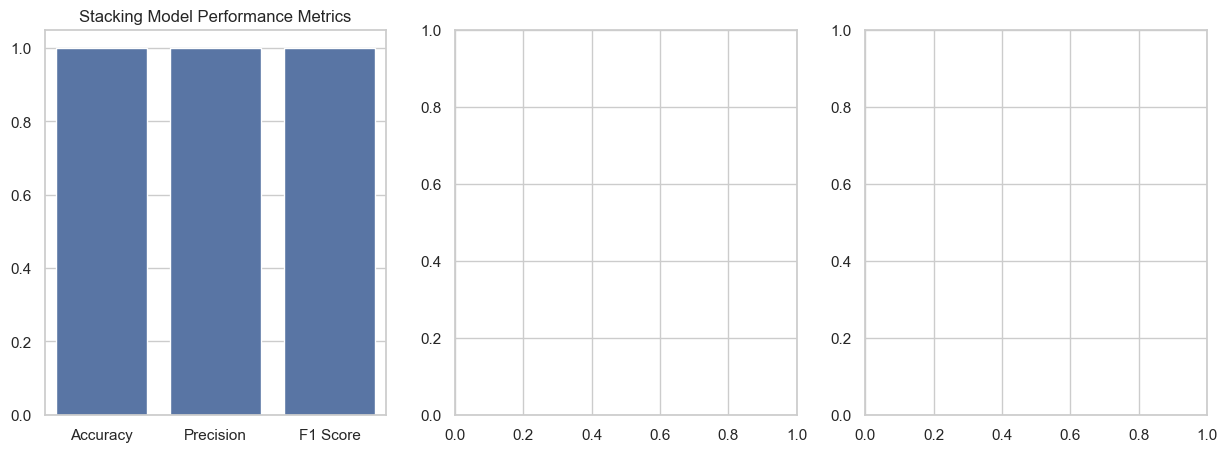

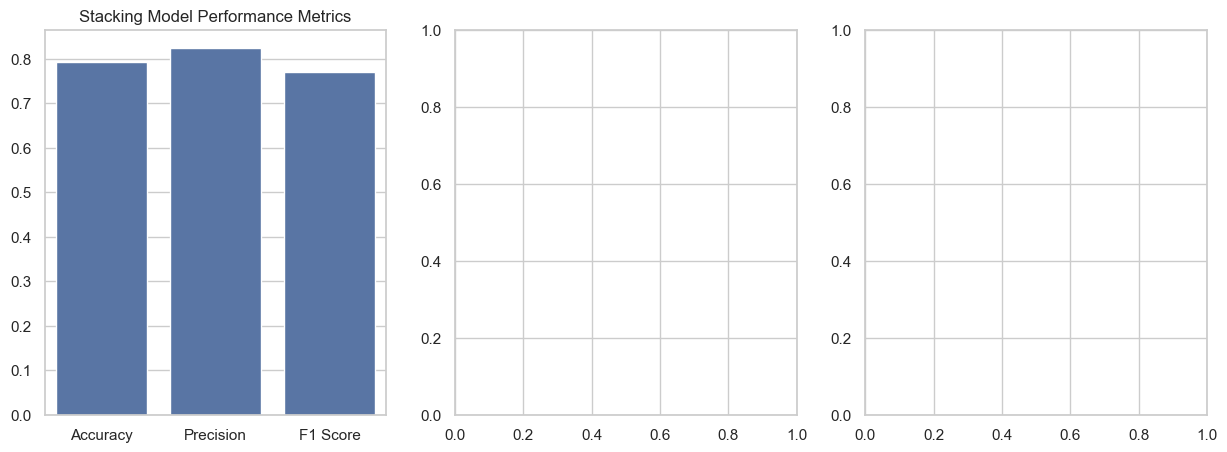

In [2]:

# Path to the data folder
data_folder = 'Competition_data'

# Function to preprocess data, train model, and save predictions
def process_dataset(dataset_path):
    print(f"Processing {dataset_path}...")
    X_train = pd.read_csv(dataset_path / 'X_train.csv')
    y_train = pd.read_csv(dataset_path / 'y_train.csv').squeeze()
    X_test = pd.read_csv(dataset_path / 'X_test.csv')
    
    # Handle missing values by filling with column means
    if X_train.isnull().any().any():
        X_train.fillna(X_train.mean(), inplace=True)
    if X_test.isnull().any().any():
        X_test.fillna(X_test.mean(), inplace=True)

    # Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Apply SMOTE for class imbalance handling
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Split training data for validation
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

    # Expanded Hyperparameter tuning for RandomForest
    rf_params = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'class_weight': ['balanced', 'balanced_subsample']
    }
    rf = RandomForestClassifier(random_state=42)
    rf_grid = GridSearchCV(rf, rf_params, scoring='f1', cv=5)
    rf_grid.fit(X_train_split, y_train_split)
    best_rf = rf_grid.best_estimator_

    # Expanded Hyperparameter tuning for XGBoost without early stopping
    xgb_params = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'eval_metric': ['logloss']
    }
    xgb = XGBClassifier(use_label_encoder=False, random_state=42)
    xgb_grid = GridSearchCV(xgb, xgb_params, scoring='f1', cv=5)
    xgb_grid.fit(X_train_split, y_train_split)
    best_xgb = xgb_grid.best_estimator_

    # Stacking Ensemble
    estimators = [('rf', best_rf), ('xgb', best_xgb)]
    stack_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=42))
    stack_model.fit(X_train_split, y_train_split)

    # Evaluate Stacking model
    stack_val_pred = stack_model.predict(X_val)
    stack_accuracy = accuracy_score(y_val, stack_val_pred)
    stack_precision = precision_score(y_val, stack_val_pred, zero_division=0)
    stack_f1 = f1_score(y_val, stack_val_pred, zero_division=0)
    stack_score = stack_accuracy * 0.3 + stack_precision * 0.4 + stack_f1 * 0.3

    print(f"Stacking Model Validation Score for {dataset_path}: Accuracy={stack_accuracy:.3f}, Precision={stack_precision:.3f}, F1 Score={stack_f1:.3f}, Score={stack_score:.3f}")

    # Visualize results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    sns.barplot(x=['Accuracy', 'Precision', 'F1 Score'], y=[stack_accuracy, stack_precision, stack_f1], ax=ax[0])
    ax[0].set_title("Stacking Model Performance Metrics")

    # Inference on test set using stacking model
    y_test_pred = stack_model.predict(X_test)
    pd.DataFrame(y_test_pred, columns=['prediction']).to_csv(dataset_path / 'y_predict.csv', index=False)

# Run the function for each dataset
dataset_paths = [Path(data_folder) / d for d in os.listdir(data_folder) if d.startswith("Dataset")]
for dataset_path in dataset_paths:
    process_dataset(dataset_path)
